# Graficas

In [5]:
# Importar los paquetes que necesitaremos
import math
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from typing import List

### Histograma

### Graficas de series de tiempo

Se obtiene la cantidad de peticiones exitosas que se le han hecho a un servidor agrupadas por mes a lo largo de 2021

In [6]:
fecha_peticiones = [
	('02', 2145),
	('03', 11035),
	('04', 29990),
	('05', 17942),
	('06', 2813),
	('07', 904),
	('08', 37708),
	('09', 510038),
	('10', 253190),
	('11', 209877),
	('12', 52029)
]

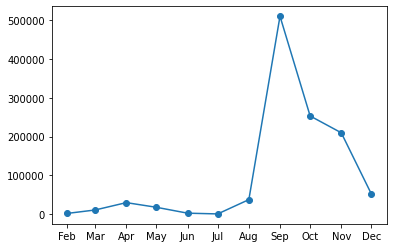

In [7]:
# hay que separar las variables para ambos ejes en listas separadas
fecha = [datetime.datetime.strptime(i[0], '%m') for i in fecha_peticiones]
peticiones = [i[1] for i in fecha_peticiones]
# grafica_serie_tiempo(fecha, peticiones, titulo = 'Uso de una app movil', etiquetay = 'Peticiones al server')

# Set the locator
locator = mdates.MonthLocator() # cada mes
# especificar el formato - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(fecha, peticiones, 'o-')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()
del fecha, peticiones